<a href="https://colab.research.google.com/github/Belal-AI/CNN_Model_Transfer_learning/blob/main/Tensorflow_specilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [ ]:
fashion_data=tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,y_train_label),(test_images,y_test_label)=fashion_data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

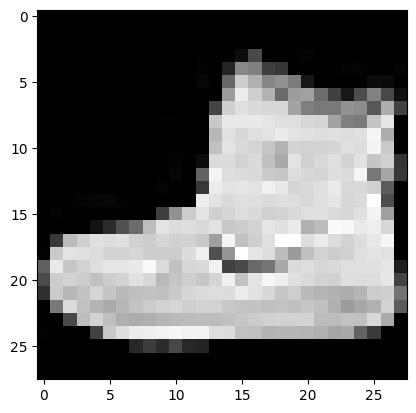

In [ ]:
plt.imshow(train_images[0],cmap='gray')

In [ ]:
np.unique(y_train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(slef,epochs,logs={}):
    if logs.get('loss')<.3:
      print('loss is low')
      slef.model.stop_training



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
X=train_images/255.0

In [ ]:
callbacks=mycallbacks()

In [ ]:
model.fit(X,y_train_label,epochs=1,validation_data=(X,y_train_label),callbacks=[callbacks])

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0829 - accuracy: 0.9687 - val_loss: 0.0934 - val_accuracy: 0.9646


In [ ]:
y_train_label.shape

(60000,)

In [1]:
from google.colab import files

In [5]:
uploaded=files.upload()

Saving 1657704580682.jpg to 1657704580682 (2).jpg
Saving 357748653_635269155335970_1248426241069867134_n.jpg to 357748653_635269155335970_1248426241069867134_n.jpg


In [6]:
uploaded.keys()

dict_keys(['1657704580682 (2).jpg', '357748653_635269155335970_1248426241069867134_n.jpg'])

In [7]:
for fn in uploaded.keys():
  print(fn)

1657704580682 (2).jpg
357748653_635269155335970_1248426241069867134_n.jpg


In [22]:
import numpy as np
x = np.array([1, 2])
y = np.array([3, 4])

In [23]:
x.shape

(2,)

In [24]:
x

array([1, 2])

In [25]:
x=np.expand_dims(x,axis=0)
y=np.expand_dims(y,axis=0)

In [33]:
images=np.vstack([x])

In [34]:
images

array([[1, 2]])

In [35]:
images=np.vstack([y])

In [36]:
images

array([[3, 4]])

In [6]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-07-17 20:30:01--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   178MB/s    in 0.8s    

2023-07-17 20:30:02 (178 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [7]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [10]:
horses_path=os.path.join("/content/horse-or-human/horses")
humans_path=os.path.join("/content/horse-or-human/humans")

In [40]:
horses_data=os.listdir(horses_path)

In [12]:
humans_data=os.listdir(humans_path)

In [42]:
horses_data_images=[]
for i in range(len(horses_path)):
  img=mpimg.imread("/content/horse-or-human/horses/"+houses_data[i])
  horses_data_images.append(img)



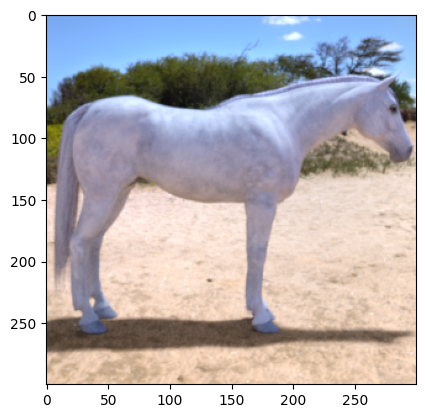

In [43]:
plt.imshow(horses_data_images[0])

In [45]:
humans_data_images=[]
for i in range(len(humans_data)):
  img=mpimg.imread("/content/horse-or-human/humans/"+humans_data[i])
  humans_data_images.append(img)

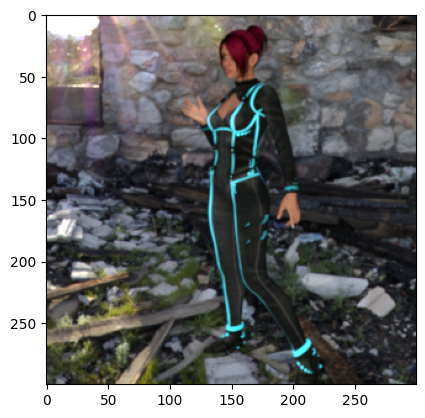

In [47]:
plt.imshow(humans_data_images[0])

In [48]:
import tensorflow as tf


In [54]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation=('relu'),input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 64)      

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
traing_gen=ImageDataGenerator(1/255)
traing_gen=traing_gen.flow_from_directory("/content/horse-or-human",target_size=(300, 300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [64]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs['accuracy'] >.99:
      self.model.stop_training=True


In [66]:
callback=mycallbacks()

In [67]:
model.fit(traing_gen,steps_per_epoch=8,epochs=1,callbacks=[callback])

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


8/8 [==============================] - 112s 13s/step - loss: 497.1978 - accuracy: 0.5083
